# 02 - SVM and its Support Vectors

Support Vector Machines are supervised learning models used for either classification or regression tasks. The algorithm is based on the "Support Vectors", the data points located at the border of two classes. According to those, SVMs fit a separating hyperplane that maximizes the margin between the classes. 

In this first exercice, you will:
 - Generate a random dataset
 - Train a Support Vector Machine
 - Visualize its Support Vectors
 - Change the Support Vector Paramaters

## Generate Data

`make_blobs` is an `sklearn` method that uses a Gaussian equation to generate separable datasets for clustering or classification.

Use it to generate data (X, y) with the following parameters:
- 40 samples (data points)
- 2 centers (class)
- random_ state = 6
- cluster_st = 1

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=40, centers=2, random_state=6, cluster_std=1)

## Train SVM 

`sklearn` has an `svm` package that does the math for you. Your job is to specify the data and parameters you want to use to train the model.

Import `svm` from `sklearn` and initiate a classification SVM (SVC) with the follwing parameters:
- linear kernel
- C = 1

Then, fit the above created data (X,y) to the model.

In [2]:
from sklearn import svm

model = svm.SVC(kernel='linear', C=1 ).fit(X, y)

## Visualize the Support Vectors 

Run the scary looking code below. The function is designed to visualize the Support Vectors with Matplotlib. It is ready to use to save you some time.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plotVectors(model): 
    
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

Use the function to plot your model

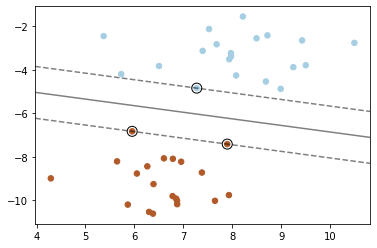

In [4]:
plotVectors(model)

## Change the Support Vector Parameter C

Initiate a new SVC with linear kernel but this time, change C=0.1

Fit the data and plot.

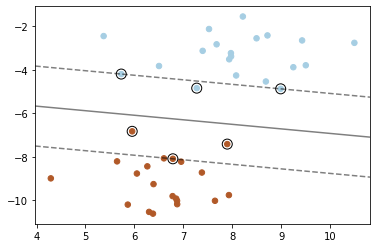

In [5]:
new_model = svm.SVC(kernel='linear', C=0.1 )

new_model.fit(X, y)

plotVectors(new_model)

You can see the  boundaries have moved and that some Support Vectors are now within the decision boundary. 

The parameter C controls the error function of the model. It manages the tradeoff between smooth decision boundary and correct classification.

In the next section, you will learn to chose the value for C that optimizes your model.